In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#!conda install -y gdown

In [12]:
#!gdown --id 1bq3IbdKNSSIAhR3JXJgDXh5XgHbvuyAo

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1bq3IbdKNSSIAhR3JXJgDXh5XgHbvuyAo
From (redirected): https://drive.usercontent.google.com/download?id=1bq3IbdKNSSIAhR3JXJgDXh5XgHbvuyAo&confirm=t&uuid=d59a76d3-3c4e-49b5-915c-f59a2b306322
To: /kaggle/working/beedataset.rar
100%|████████████████████████████████████████| 131M/131M [00:02<00:00, 53.0MB/s]


In [5]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 113 kB of archives.
After this operation, 406 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 unrar amd64 1:5.6.6-2build1 [113 kB]
Fetched 113 kB in 0s (621 kB/s) 
Selecting previously unselected package unrar.
(Reading database ... 113807 files and directories currently installed.)
Preparing to unpack .../unrar_1%3a5.6.6-2build1_amd64.deb ...
Unpacking unrar (1:5.6.6-2build1) ...
Setting up unrar (1:5.6.6-2build1) ...
update-alternatives: using /usr/bin/unrar-nonfree to provide /usr/bin/unrar (unrar) in auto mode
update-alternatives: warning: skip creation of /usr/share/man/man1/unrar.1.gz because associated file /usr/share/man/man1/unrar-nonfree.1.gz (of link group unrar) doesn't exist
Processing triggers f

In [ ]:
! unrar x beedataset.rar /kaggle/working

In [7]:
import pandas as pd
import numpy as np

def create_label_folder(datafolder):
    
    datacsv = pd.DataFrame(columns = ['filename','label'])

    datalabel = []
    fullname = []

    files = os.listdir(datafolder)
    for images in files:
        if 'bnbee' in images:
            datalabel.append('bumble')
        elif 'hnbee' in images:
            datalabel.append('honey')
        fullname.append(os.path.join(datafolder, images))
    datacsv.label = datalabel
    datacsv.filename = fullname

    datacsv.to_csv('/kaggle/working/beedataset/label.csv', index=False)

    datacsv.head()

In [9]:
# imprting the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
%matplotlib inline
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow.keras.preprocessing  as kp
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint


2024-03-13 10:42:34.454460: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 10:42:34.454562: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 10:42:34.627197: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
os.remove('/kaggle/working/beedataset/label2.csv')

In [2]:
import shutil

In [3]:
source = r"/kaggle/input/beeclassification/beedataset.rar"
dest = r"/kaggle/working/"



In [4]:
shutil.copy(source, dest)
print('copied')

copied


In [11]:
create_label_folder('/kaggle/working/beedataset')

In [12]:
data = pd.read_csv('/kaggle/working/beedataset/label.csv')
data.head()

,filename,label
0,/kaggle/working/beedataset/bnbeeimg1378.jpg,bumble
1,/kaggle/working/beedataset/hnbeeimg3265.jpg,honey
2,/kaggle/working/beedataset/hnbeeimg3390.jpg,honey
3,/kaggle/working/beedataset/hnbeeimg4846.jpg,honey
4,/kaggle/working/beedataset/hnbeeimg3879.jpg,honey


In [13]:

# splitting the dataset
def train_test_valid_split(source_dir, cvs_path,max_batch_size, train_split, test_split, x_col, y_col, class_mode, target_size, scale):

    data=pd.read_csv(cvs_path).copy()

    te_split=test_split/(1-train_split)

    train_df=data.sample(n=None,
                         frac=train_split,
                         replace=False,
                         weights=None,
                         random_state=123,
                         axis=0)

    tr_batch_size= max_batch_size

    #tr_steps=int(len(train_df.index)//tr_batch_size)

    dummy_df=data.drop(train_df.index, axis=0, inplace=False)

    test_df=dummy_df.sample(n=None,
                            frac=te_split,
                            replace=False,
                            weights=None,
                            random_state=123,
                            axis=0)

    #te_batch_size, te_steps=get_bs(len(test_df.index),max_batch_size)
    te_batch_size = max_batch_size
    #te_steps = int(len(test_df.index)//te_batch_size)

    valid_df=dummy_df.drop(test_df.index, axis=0)
    v_batch_size = max_batch_size
    #v_steps=int(len(valid_df.index)//v_batch_size)

    gen=ImageDataGenerator(rescale=scale,
                           rotation_range = rotation_range,
                           width_shift_range = width_shift_range,
                           height_shift_range = height_shift_range,
                           shear_range = shear_range,
                           zoom_range = zoom_range,
                          horizontal_flip = horizontal_flip,
                           fill_mode = fill_mode)

    train_gen=gen.flow_from_dataframe(dataframe=train_df,
                                      directory=source_dir,
                                      batch_size=tr_batch_size,
                                      x_col=x_col,
                                      y_col=y_col,
                                      target_size=target_size,
                                      class_mode=class_mode,
                                      seed=123,
                                      validate_filenames=False)

    test_gen=gen.flow_from_dataframe(dataframe=test_df,
                                     directory=source_dir,
                                     batch_size=te_batch_size,
                                     x_col=x_col,
                                     y_col=y_col,
                                     target_size=target_size,
                                     class_mode=class_mode,
                                     shuffle=False,
                                     validate_filenames=False)

    valid_gen=gen.flow_from_dataframe(dataframe=valid_df,
                                      directory=source_dir,
                                      batch_size=v_batch_size,
                                      x_col=x_col,
                                      y_col=y_col,
                                      target_size=target_size,
                                      class_mode=class_mode,
                                      shuffle=False,
                                      validate_filenames=False)
    tr_steps = len(train_gen)
    te_steps = len(test_gen)
    v_steps = len(valid_gen)

    return train_gen, tr_steps, test_gen, te_steps, valid_gen , v_steps

In [14]:
# def get_bs(length, b_max):
 #   batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=b_max],reverse=True)[0]
  ## return batch_size, steps

# the data augmentation
source_dir = '/kaggle/working/beedataset'
csv_folder = '/kaggle/working/beedataset/label.csv'
train_split = 0.8
test_split = 0.1
x_column = 'filename'
y_column = 'label'
target_size = (260, 260)
scale = 1.0/ 255.0
batch_size = 64
class_mode = 'binary'
rotation_range=20
width_shift_range=0.2
height_shift_range=0.2
shear_range=0.2
zoom_range=0.2
horizontal_flip=True
fill_mode='nearest'
kernel_s=(3,3)


In [15]:
train_gen, train_steps, test_gen, test_steps, valid_gen, valid_steps=train_test_valid_split(source_dir,
                                                                                            csv_folder,
                                                                                            batch_size,
                                                                                            train_split,
                                                                                            test_split,
                                                                                            x_column,
                                                                                            y_column,
                                                                                            class_mode,
                                                                                            target_size,
                                                                                            scale)
print ('train steps: ', train_steps, '  test steps: ', test_steps, '  valid steps: ', valid_steps)

Found 7920 non-validated image filenames belonging to 2 classes.
Found 990 non-validated image filenames belonging to 2 classes.
Found 990 non-validated image filenames belonging to 2 classes.
train steps:  124   test steps:  16   valid steps:  16


In [16]:
train_gen.image_shape

(260, 260, 3)

In [17]:
# building the model
model=tf.keras.Sequential()

model.add(layers.InputLayer(shape=(260,260,3), name='Input_Layer'))
model.add(layers.Conv2D(32,kernel_s,activation='relu',kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

# model compilation
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])

# callback
from tensorflow.keras.callbacks import ModelCheckpoint


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 258, 258, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 129, 129, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,457,921 (5.56 MB)

 Trainable params: 1,457,921 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Define the ModelCheckpoint callback
dirpath = '/kaggle/working/models/bestmodel.keras'
checkpoint_callback = ModelCheckpoint(
 filepath= dirpath,
 monitor='val_acc',
 save_best_only=True,
 mode='max',
 verbose=1
)

In [19]:
#training the model
#model_training = model.fit(train_gen,
 #                          #steps_per_epoch=train_steps,
  #                         epochs=50,
   #                        validation_data=test_gen,
    #                       #validation_steps=61,
     #                      callbacks=[checkpoint_callback]

      #                    )

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/124 ━━━━━━━━━━━━━━━━━━━━ 1:00:24 29s/step - acc: 0.4375 - loss: 0.7021

I0000 00:00:1710326699.773295     229 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710326699.793907     229 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 26/124 ━━━━━━━━━━━━━━━━━━━━ 2:20 1s/step - acc: 0.5041 - loss: 0.7050 

W0000 00:00:1710326735.437452     229 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 962ms/step - acc: 0.6092 - loss: 0.6522

W0000 00:00:1710326820.676045     230 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_acc improved from -inf to 0.77071, saving model to /kaggle/working/models/bestmodel.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - acc: 0.6098 - loss: 0.6518 - val_acc: 0.7707 - val_loss: 0.5049
Epoch 2/50


W0000 00:00:1710326837.320024     231 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step - acc: 0.7488 - loss: 0.5253
Epoch 2: val_acc improved from 0.77071 to 0.77273, saving model to /kaggle/working/models/bestmodel.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 127s 975ms/step - acc: 0.7489 - loss: 0.5253 - val_acc: 0.7727 - val_loss: 0.5098
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 867ms/step - acc: 0.7690 - loss: 0.4951
Epoch 3: val_acc improved from 0.77273 to 0.78990, saving model to /kaggle/working/models/bestmodel.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 128s 982ms/step - acc: 0.7691 - loss: 0.4951 - val_acc: 0.7899 - val_loss: 0.4791
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - acc: 0.7729 - loss: 0.4985
Epoch 4: val_acc did not improve from 0.78990
124/124 ━━━━━━━━━━━━━━━━━━━━ 128s 978ms/step - acc: 0.7730 - loss: 0.4984 - val_acc: 0.7727 - val_loss: 0.4926
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - acc: 0.7770 - loss: 0.4890
Epoch 5: val_acc did not improve from 0.78990
124/124 ━━━━━━━━━━━━━━━━━━━━ 127s 976ms/st

In [51]:
print('done')

done


In [20]:
history_df = pd.DataFrame(model_training.history)
history_df.describe()

,acc,loss,val_acc,val_loss
count,50.000000,50.000000,50.000000,50.000000
mean,0.862780,0.325139,0.856000,0.343358
std,0.052687,0.097036,0.039320,0.072405
min,0.678157,0.202925,0.765657,0.257103
25%,0.833460,0.245923,0.836616,0.289196
50%,0.879861,0.300854,0.869192,0.320903
75%,0.902872,0.389062,0.887879,0.382199
max,0.921843,0.600230,0.898990,0.509790


In [21]:
history_df.to_csv('/kaggle/working/model_training_history.csv')

In [22]:
history_df.head()

,acc,loss,val_acc,val_loss
0,0.678157,0.600230,0.770707,0.504922
1,0.750253,0.523259,0.772727,0.509790
2,0.771086,0.494680,0.789899,0.479055
3,0.778030,0.490686,0.772727,0.492554
4,0.784343,0.473285,0.765657,0.494275


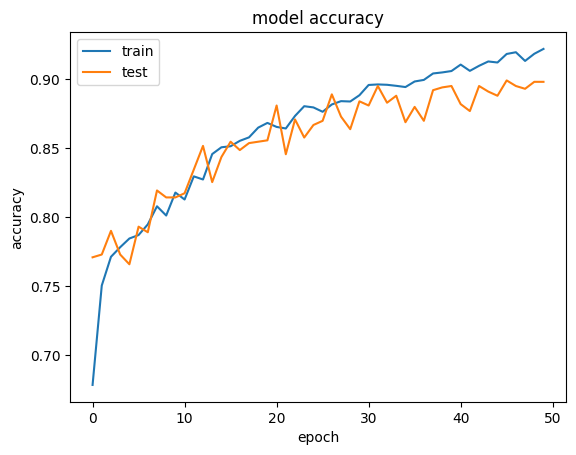

In [23]:
#plt.plot(model_training.history['loss'])
plt.plot(model_training.history['acc'])
#plt.plot(model_training.history['val_loss'])
plt.plot(model_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

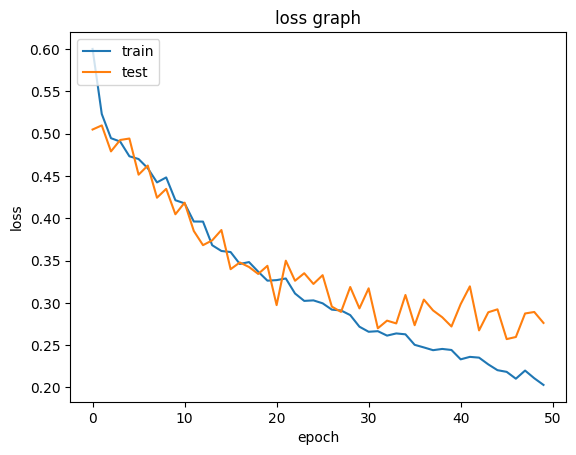

In [24]:
plt.plot(model_training.history['loss'])
#plt.plot(model_training.history['acc'])
plt.plot(model_training.history['val_loss'])
#plt.plot(model_training.history['val_acc'])
plt.title('loss graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')